<a href="https://colab.research.google.com/github/dioapw/TUBES_STATISTIKA_DATA/blob/main/TUBES_STATISTIKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUBES STATISTIKA**

Deskripsi masalah tentang data : (https://www.kaggle.com/sakshigoyal7/credit-card-customers)

Manager suatu bank ingin mendapat gambaran tentang karakteristik pemegang kartu kredit yang mereka terbitkan, berdasarkan data berisi fitur-fitur pemegang kartu kredit (kolom A-U) dan peluang pemegang kartu kredit berpindah ke bank lain (kolom V dan W). 

Sekarang, kumpulan data ini terdiri dari 10.000 pelanggan yang menyebutkan usia, gaji, status_kawinan, batas kartu kredit, kategori kartu kredit, dll. Ada hampir 18 fitur.

Lakukan eksplorasi menggunakan metode yang sudah dipelajari untuk mendapatkan informasi yang akan anda presentasikan kepada manager bank. 


Anggota Kelompok:
*   Dio Aditya Putra Wardhono (1301194290)
*   Yusril Ramadhan (1301194075)
*   Rafly Ahmad Yanuar (1301194119)
*   Fahrul Raykhan Ridho (1301194399)




---




## **Import Library & Install Packages**

In [ ]:
install.packages("psych")
install.packages("tidyverse")
install.packages("hrbrthemes")
install.packages("ggrepel")
install.packages("questionr")
library(hrbrthemes)
library(tidyverse)

## **Memuat File CSV**

Muat file CSV dari GitHub repository

In [ ]:
dataset_urlfile ="https://raw.githubusercontent.com/dioapw/TUBES_STATISTIKA_DATA/main/BankChurners.csv"

Muat file CSV ke variabel "bank_data"

In [ ]:
bank_data <- read.csv(url(dataset_urlfile))
attach(bank_data)

The following objects are masked from bank_data (pos = 3):

    Attrition_Flag, Avg_Open_To_Buy, Avg_Utilization_Ratio,
    Card_Category, CLIENTNUM, Contacts_Count_12_mon, Credit_Limit,
    Customer_Age, Dependent_count, Education_Level, Gender,
    Income_Category, Marital_Status, Months_Inactive_12_mon,
    Months_on_book,
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,
    Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,
    Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1,
    Total_Relationship_Count, Total_Revolving_Bal, Total_Trans_Amt,
    Total_Trans_Ct




## **Penjelasan Tentang Dataset**

*Sebelum kita melakukan eksplorasi dari dataset ini serta menganalisisnya, kita akan mencari tahu lebih dalam mengenai data-data yang ada di dataset ini.*





**1. Menampilkan jumlah kolom dalam dataset**




*Pertama, kita akan melihat berapa jumlah kolom dalam dataset ini.*

In [ ]:
ncol(bank_data)

[1] 23

**2. Menampilkan jumlah baris dalam dataset**

*Kedua, kita akan melihat berapa jumlah baris yang ada di dataset ini.*

In [ ]:
nrow(bank_data)

[1] 10127

**3. Daftar nama variabel dalam dataset**

*Ketiga, kita akan mencari tahu nama-nama variabel yang ada di dataset ini.*

In [ ]:
data.frame(names(bank_data))

names.bank_data.
<chr>
CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category




---


*Penjelasan:*
* *CLIENTNUM = Nomor klien. Pengenal unik untuk pelanggan yang memegang akun*
* *Attrition_Flag = Variabel peristiwa internal (aktivitas pelanggan) - jika akun ditutup maka 1 lainnya 0*
* *Customer_Age = Variabel demografis - Usia Pelanggan dalam Tahun*
* *Gender = Variabel demografis - M = Pria, F = Wanita*
* *Dependent_count = Variabel demografis - Jumlah tanggungan*
* *Education_Level = Variabel demografis - Kualifikasi Pendidikan pemegang akun (contoh: sekolah menengah, lulusan perguruan tinggi, dll.)*
* *Marital_Status = Variabel demografis - Menikah, Lajang, Bercerai, Tidak Diketahui*
* *Income_Category = Variabel demografis - Kategori Pendapatan Tahunan pemegang akun (<$ 40K, $ 40K - 60K, $ 60K - $ 80K, $ 80K- $ 120K,> $ 120K, Tidak Diketahui)*
* *Card_Category = Variabel Produk - Jenis Kartu (Biru, Perak, Emas, Platinum)*
* *Months_on_book = Jangka waktu hubungan dengan bank*
* *Total_Relationship_Count = Jumlah total produk yang dipegang oleh pelanggan*
* *Months_Inactive_12_mon = Jumlah bulan tidak aktif dalam 12 bulan terakhir*
* *Contacts_Count_12_mon = Jumlah Kontak dalam 12 bulan terakhir*
* *Credit_Limit = Limit Kredit pada Kartu Kredit*
* *Total_Revolving_Bal = Total Saldo Bergulir pada Kartu Kredit*
* *Avg_Open_To_Buy = Open to Buy Credit Line (Rata-rata 12 bulan terakhir)*
* *Total_Amt_Chng_Q4_Q1 = Perubahan Jumlah Transaksi (Q4 sampai Q1)*
* *Total_Trans_Amt = Jumlah Transaksi Total (12 bulan terakhir)*
* *Total_Trans_Ct = Banyaknya Jumlah Transaksi (12 bulan terakhir)*
* *Total_Ct_Chng_Q4_Q1 = Perubahan Hitungan Transaksi (Q4 sampai Q1)*
* *Avg_Utilization_Ratio = Rasio Penggunaan Kartu Rata-rata*
* *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 = Naive Bayes*
* *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 = Naive Bayes*

**4. Menampilkan struktur dataset**

*Keempat, kita akan mencari tahu bagaimana struktur data dalam dataset ini.*

In [ ]:
str(bank_data)

'data.frame':	10127 obs. of  23 variables:
 $ CLIENTNUM                                                                                                                         : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag                                                                                                                    : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr  "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : int  3 5 3 4 3 2 4 0

*Dapat kita lihat bahwa terdapat 3 tipe data yang ada di dataset ini, yaitu: integer, character dan number.Kita juga dapat melihat terdapat beberapa variabel yang termasuk dalam data nominal, ordinal, interval dan rasio,*

*seperti: Gender = nominal, Card_Category = ordinal, Credit_Limit = interval, Total_Trans_Amt = rasio, dll.*

**5. Menampilkan 8 baris pertama dari dataset**

*Kelima, kita akan melihat 8 baris pertama dari dataset ini agar kita dapat mengetahui gambaran awal mengenai dataset ini.*

In [ ]:
head(bank_data,8)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,12691,777,11914,1.335,1144,42,1.625,0.061,0.00009340,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,8256,864,7392,1.541,1291,33,3.714,0.105,0.00005690,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,3418,0,3418,2.594,1887,20,2.333,0.000,0.00002110,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,3313,2517,796,1.405,1171,20,2.333,0.760,0.00013366,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,4716,0,4716,2.175,816,28,2.500,0.000,0.00002170,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,⋯,4010,1247,2763,1.376,1088,24,0.846,0.311,0.00005510,0.99994
7,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,⋯,34516,2264,32252,1.975,1330,31,0.722,0.066,0.00012303,0.99988
8,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,⋯,29081,1396,27685,2.204,1538,36,0.714,0.048,0.00008580,0.99991


**6. Menampilkan 8 baris terakhir dari dataset**



*Keenam, kita akan melihat 8 baris terakhir dari dataset agar kita dapat mengetahui apakah ada perbedaan dari 8 baris pertama yang sebelumnya kita lihat.*

In [ ]:
tail(bank_data,8)

*Dapat dilihat bahwa data dari 8 baris pertama dengan 8 baris terakhir tidak berbeda, variabel masih terisi semua.*

**7. Menampilkan jumlah data yang hilang**

*Ketujuh, kita akan melihat apakah ada missing value dari dataset ini untuk masing-masing variabel.*

In [ ]:
data.frame(missing_value = unclass(colSums(is.na(bank_data))))

*Kita bisa lihat bahwa tidak ada data yang hilang di dalam variabel dataset ini atau dapat dikatakan semua variabel memiliki data yang valid.*



**8. Hitung deskripsi statistik**

*Kedelapan, kita akan menghitung deskripsi statistik dari tiap-tiap variabel di dataset ini.*

In [ ]:
data.frame(unclass(summary(bank_data)))

*Kita dapat melihat beberapa nilai dari mean, median, kuartil 1, kuartil 3, minimum dan maksimum untuk beberapa variabel di dalam dataset ini.Terdapat juga beberapa data terkait length, class dan mode untuk beberapa variabel. Maka dapat disimpulkan secara global bahwa variabel yang memiliki mean, median, kuartil 1 dan 3, minimum dan maksimum merupakan variabel interval atau rasio sedangkan variabel yang mempunyai length, class dan mode termasuk variabel nominal atau ordinal.*

*Untuk saat ini kita hanya melihat gambaran umum dari deskripsi statistik untuk semua variabel di dalam dataset ini. Adapun penjelasan lebih lanjut untuk beberapa variabel diatas, kita akan membahasnya di bagian eksplorasi data.*

## **Eksplorasi & Analisis Data**

*Selanjutnya kita akan melakukan eksplorasi dan analisis dari beberapa variabel di dalam dataset ini  agar kita dapat mengetahui lebih lanjut mengenai karakteristik data di dalam dataset ini.*

*Variabel yang akan diambil adalah Total_Trans_Ct, Total_Trans_Amt, Card_Category dan Education_Level.*



### **1. Total_Trans_Ct**

*   **Deskripsi Statistik**




In [ ]:
x <- c(Total_Trans_Ct)
psych::describe(x,quant=c(.25,.5,.75),IQR=TRUE)

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,IQR,Q0.25,Q0.5,Q0.75
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10127,64.85869,23.47257,67,64.30088,25.2042,10,139,129,0.1536275,-0.3680943,0.2332492,36,45,67,81


*Dari deskripsi diatas dapat diketahui bahwa  untuk nilai mean atau rata-rata Total_Trans_Ct adalah 65 yang artinya rata-rata dari nilai data kita adalah sekitar itu.*

*Standard error dari Total_Trans_Ct bernilai  0.23 , karena nilai SE nya kecil maka semakin akurat sample tersebut mewakili populasi. SE yang kecil menunjukkan semakin mirip sampling mean tersebut dengan population mean.*

*Median adalah nilai tengah dari data yang diurutkan, maka median dari Total_Trans_Ct adalah 67 yang menandakan nilai tengah dari data tersebut dan biasanya median digunakan jika mean tidak mampu menjelaskan data dengan baik.*

*Standar deviasi menunjukkan keheterogenan data yang diteliti dan di Total_Trans_Ct kita memiliki std 23, maka ini menandakan data kita menyebar dan memiliki kecenderungan setiap data berbeda satu sama lainnya karena semakin besar nilai std maka semakin menyebar data pengamatan.*

*Kurtosis menandakan keruncingan suatu distribusi data, Total_Trans_Ct memiliki kurtosis -0.37 atau bernilai negatif karena itu ini menandakan distribusi relatif datar, karena jika kurtosis bernilai positif distribusi akan relatif runcing.*

*Skewness menandakan kemiringan sebaran data. Total_Trans_Ct memiliki skewness 0.15, karena ini bernilai positif maka menandakan ujung dari kemiringan menjulur ke arah positif (ekor kurva sebelah kanan lebih panjang).*

*Range adalah jarak penyebaran data antara nilai minimum dengan maksimum. Total_Trans_Ct mempunyai range yang bernilai 129, maka karena range yang relatif besar ini menunjukkan data menjauhi nilai pusat atau data yang panjang.*

*Kuartil digunakan membagi data menjadi empat bagian. Kuartil bawah (Q1) Total_Trans_Ct bernilai 45 ,yang merupakan nilai tengah antara nilai terkecil dan median dari Total_Trans_Ct serta menjadi penanda bahwa data pada kuartil tersebut berada 25% dari bawah pada Total_Trans_Ct. Kuartil kedua (Q2) Total_Trans_Ct adalah 67, yang merupakan median data serta yang menandai 50% data. Kuartil atas (Q3) Total_Trans_Ct adalah 81, yang merupakan nilai tengah antara median dan nilai tertinggi dari Total_Trans_Ct serta menjadi penanda bahwa data pada kuartil tersebut berada 75% dari bawah Total_Trans_Ct.*

*Interquartile range dari Total_Trans_Ct adalah 36, karena nilai IQR dari data ini termasuk tinggi maka penyebaran datanya juga besar.*



In [ ]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

Mode(x)

[1] 81

*Mode adalah data yang paling sering muncul. Total_Trans_Ct memiliki mode 81, yang menandakan nilai 81 merupakan data yang frekuensinya terbanyak.*



In [ ]:
var(x)

[1] 550.9616

*Varians adalah ukuran seberapa jauh sebuah kumpulan data tersebar. Di dalam Total_Trans_Ct kita mempunyai varians 550.961563494206, maka data ini mempunyai varians yang tinggi yang menunjukkan data sangat tersebar di sekitar nilai rerata.*




*   **Identifikasi Pencilan**


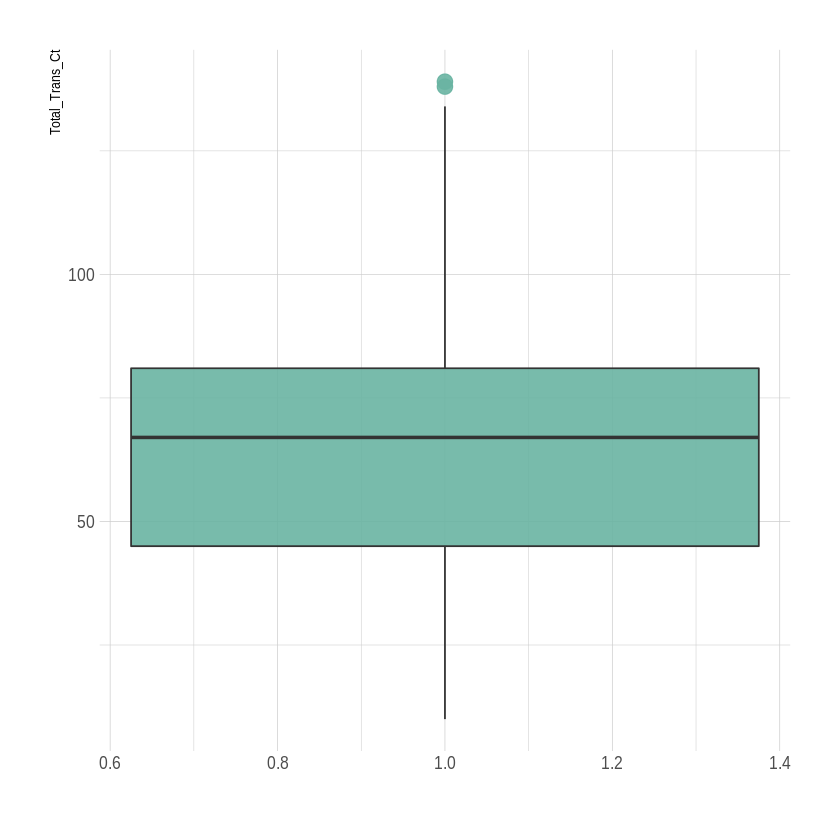

In [ ]:
ggplot(bank_data) +
  aes(x = 1, y = Total_Trans_Ct) +
  geom_boxplot(fill="#69b3a2",alpha = 0.9, outlier.color = "#69b3a2", outlier.size=4) + 
    xlab("") +
    theme_ipsum()

*Kita dapat melihat dari boxplot diatas terdapat 2 pencilan dari variabel Total_Trans_Ct.*

*   **Penyebaran dan Kemiringan Data**


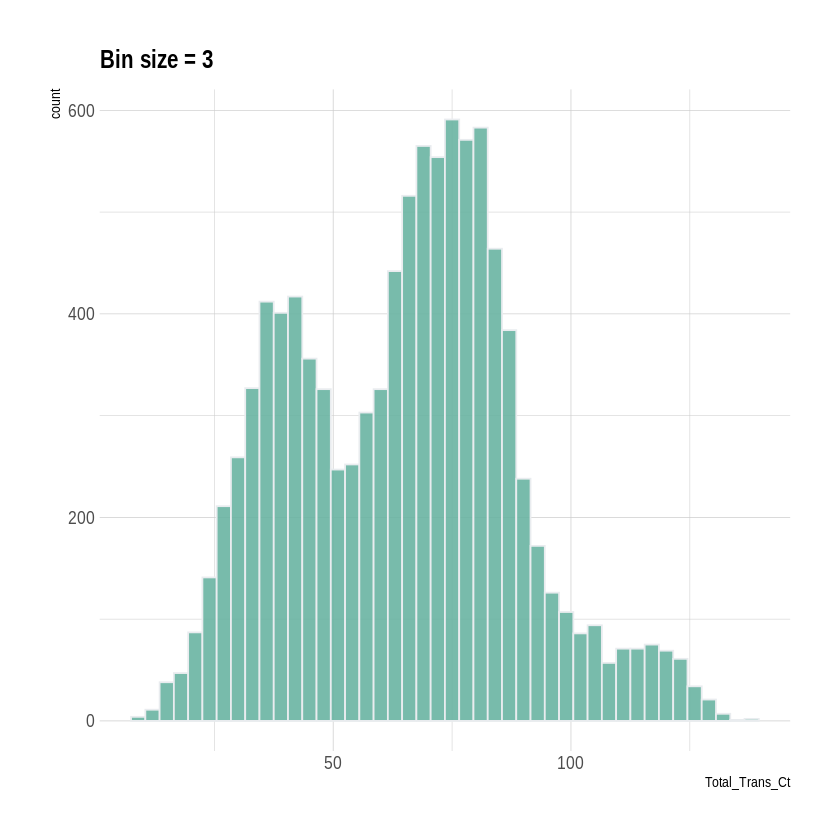

In [ ]:
ggplot(bank_data) +
  aes(x = Total_Trans_Ct) +
  geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Bin size = 3") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )

*Dari bentuk histogram maka kita dapat melihat bahwa Total_Trans_Ct memiliki titik tengah antara 60 - 80, kemudian kita dapat melihat dengan lebih jelas bahwa Total_Trans_Ct memiliki kemiringan cenderung positif dikarenakan ujung dari kemiringan menjulur ke arah positif (ekor kurva sebelah kanan lebih panjang). Keruncingan dari Total_Trans_Ct terlihat jelas relatif datar dan penyebaran data dari histogram Total_Trans_Ct juga menyebar.*

*   **Pertumbuhan Data**


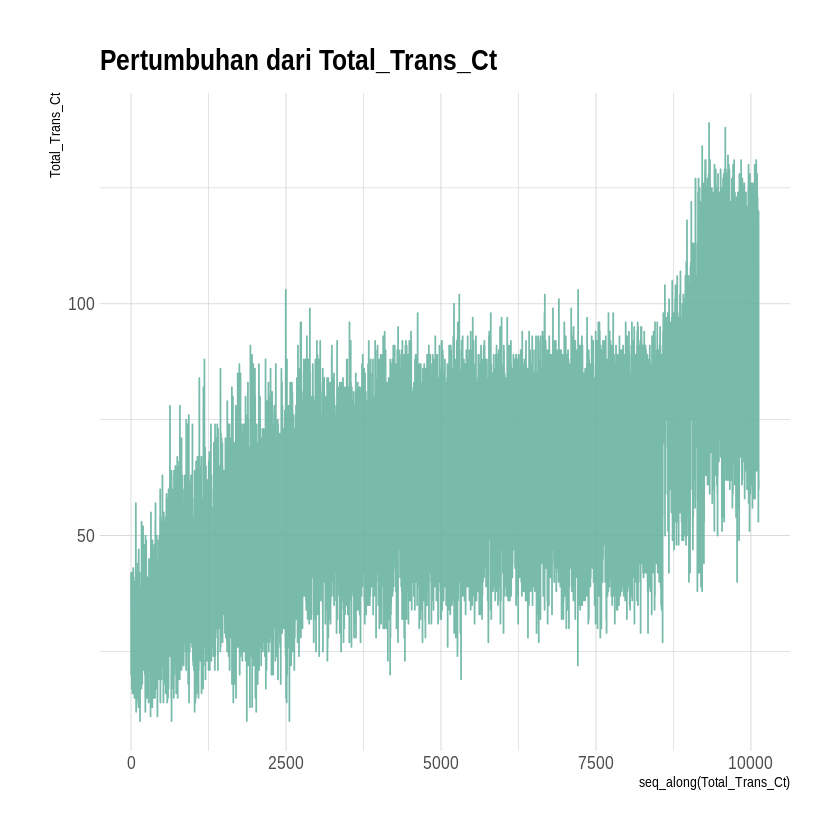

In [ ]:
ggplot(bank_data, aes(x=seq_along(Total_Trans_Ct), y=Total_Trans_Ct)) +
  geom_line( color="#69b3a2", alpha=0.9) +
  theme_ipsum() +
  ggtitle("Pertumbuhan dari Total_Trans_Ct")

*Dari line plot diatas, dapat diketahui bahwa banyak data yang bernilai antara 50 - 100 sedangkan data yang bernilai diatas 100 relatif sedikit dibanding nilai lainnya.*

### **2. Total_Trans_Amt**

*   **Deskripsi Statistik**

In [ ]:
y <- c(Total_Trans_Amt)
psych::describe(y,quant=c(.25,.5,.75),IQR=TRUE)

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,IQR,Q0.25,Q0.5,Q0.75
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10127,4404.086,3397.129,3899,3707.917,1939.241,510,18484,17974,2.040399,3.890148,33.75761,2585.5,2155.5,3899,4741


*Dari deskripsi diatas dapat diketahui bahwa  untuk nilai mean atau rata-rata Total_Trans_Amt adalah 4404 yang artinya rata-rata dari nilai data kita adalah sekitar itu.*

*Standard error dari Total_Trans_Amt bernilai  34 , karena nilai SE nya relatif besar maka semakin tidak akurat sample tersebut mewakili populasi.*

*Median dari Total_Trans_Amt adalah 3899 yang menandakan nilai tengah dari data tersebut.*

*Standar deviasi dari Total_Trans_Amt adalah 3397, maka ini menandakan data kita menyebar dan memiliki kecenderungan setiap data berbeda satu sama lainnya.*

*Total_Trans_Amt memiliki kurtosis 3.9 atau bernilai positif karena itu ini menandakan distribusi relatif runcing.*

*Total_Trans_Amt memiliki skewness 2, karena ini bernilai positif maka menandakan ujung dari kemiringan menjulur ke arah positif (ekor kurva sebelah kanan lebih panjang).*

*Total_Trans_Amt mempunyai range yang bernilai 17974, maka karena range yang relatif besar ini menunjukkan data menjauhi nilai pusat atau data yang panjang.*

*Kuartil bawah (Q1) Total_Trans_Amt bernilai 2156 ,yang merupakan nilai tengah antara nilai terkecil dan median dari Total_Trans_Amt serta menjadi penanda bahwa data pada kuartil tersebut berada 25% dari bawah pada Total_Trans_Amt. Kuartil kedua (Q2) Total_Trans_Amt adalah 3899, yang merupakan median data serta yang menandai 50% data. Kuartil atas (Q3) Total_Trans_Amt adalah 4741, yang merupakan nilai tengah antara median dan nilai tertinggi dari Total_Trans_Amt serta menjadi penanda bahwa data pada kuartil tersebut berada 75% dari bawah Total_Trans_Amt.*

*Interquartile range dari Total_Trans_Amt adalah 2586, karena nilai IQR dari data ini termasuk tinggi maka penyebaran datanya juga besar.*

In [ ]:
Mode(y)

[1] 4253

*Total_Trans_Amt memiliki mode 4253, yang menandakan nilai 4253 merupakan data yang frekuensinya terbanyak.*

In [ ]:
var(y)

[1] 11540487

*Di dalam Total_Trans_Amt kita mempunyai varians 11540487.1653733, maka data ini mempunyai varians yang tinggi yang menunjukkan data sangat tersebar di sekitar nilai rerata.*

*   **Identifikasi Pencilan**

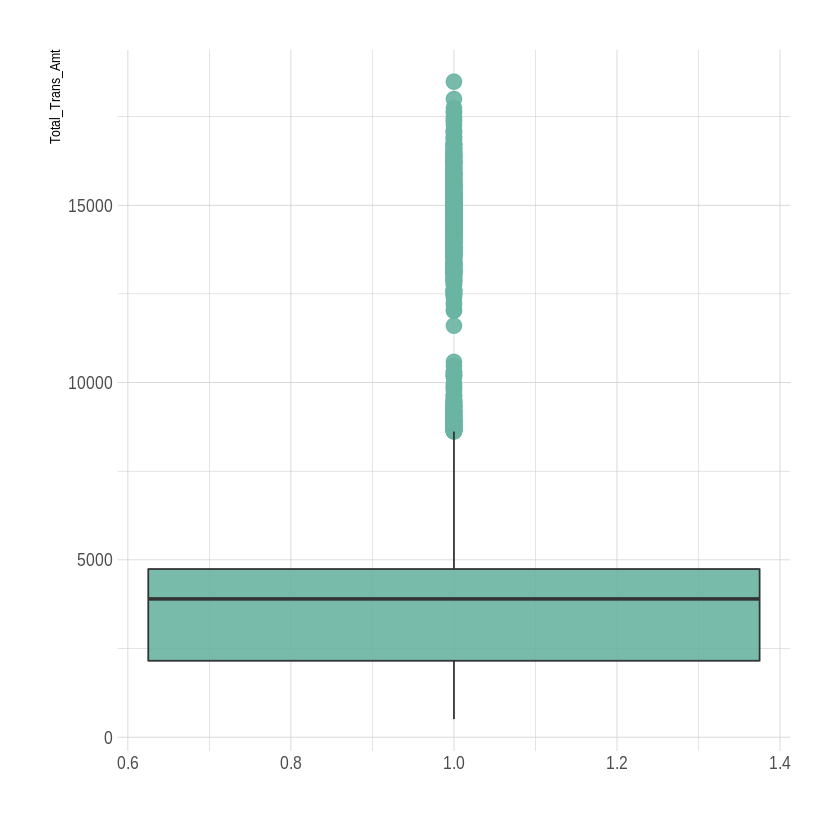

In [ ]:
ggplot(bank_data) +
  aes(x = 1, y = Total_Trans_Amt) +
  geom_boxplot(fill="#69b3a2",alpha = 0.9, outlier.color = "#69b3a2", outlier.size=4) + 
    xlab("") +
    theme_ipsum()

*Kita lihat dari data boxplot diatas terdapat banyak pencilan dari variabel Total_Trans_Amt.*

*   **Penyebaran dan Kemiringan Data**

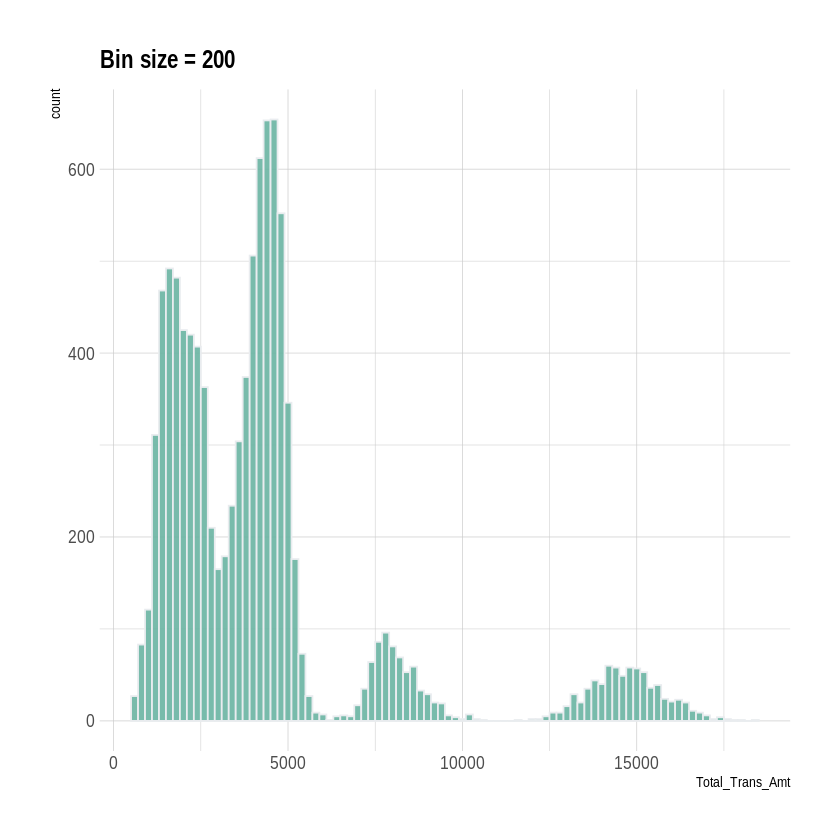

In [ ]:
ggplot(bank_data) +
  aes(x = Total_Trans_Amt) +
  geom_histogram(binwidth = 200,fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Bin size = 200") +
    theme_ipsum() +
    theme(
      plot.title = element_text(size=15)
    )

*Dari bentuk histogram maka kita dapat melihat bahwa Total_Trans_Amt memiliki titik tengah antara 4000 - 5000, kemudian kita dapat melihat dengan lebih jelas bahwa Total_Trans_Amt memiliki kemiringan cenderung positif dikarenakan ujung dari kemiringan menjulur ke arah positif (ekor kurva sebelah kanan lebih panjang). Keruncingan dari Total_Trans_Amt terlihat jelas relatif runcing dan penyebaran data dari histogram Total_Trans_Amt sangat menyebar.*

*   **Pertumbuhan Data**

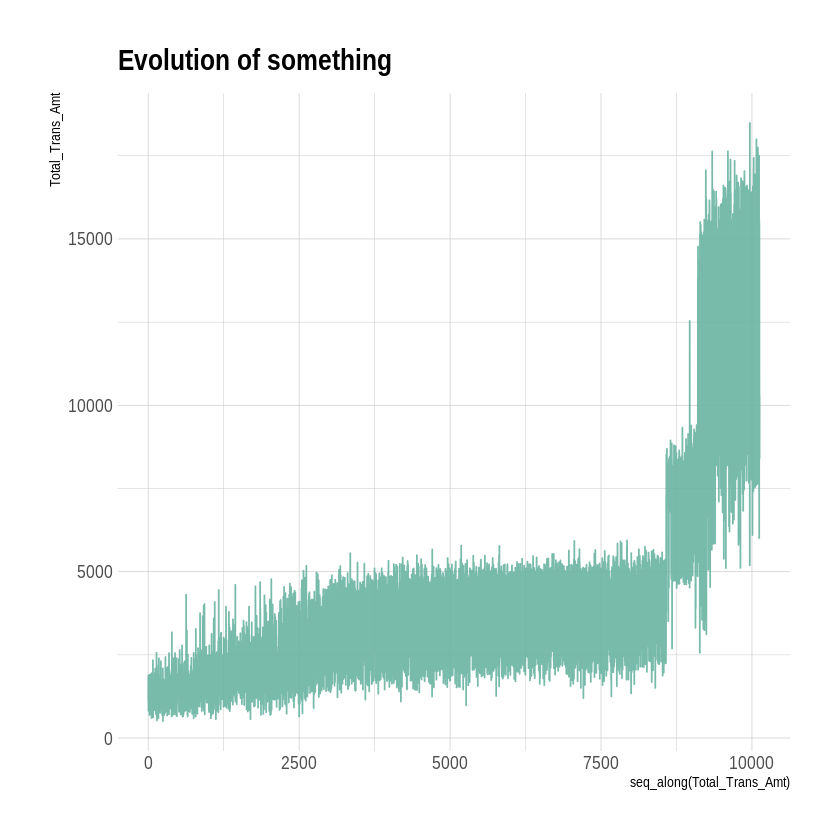

In [ ]:
ggplot(bank_data, aes(x=seq_along(Total_Trans_Amt), y=Total_Trans_Amt)) +
  geom_line( color="#69b3a2", alpha=0.9) +
  theme_ipsum() +
  ggtitle("Evolution of something")

*Dari line plot diatas, dapat diketahui bahwa banyak data yang bernilai antara 0 - 5000 sedangkan data yang bernilai diatas 5000 atau 10000 relatif sedikit dibanding nilai lainnya.*

* **Hubungan Antara Total_Trans_Ct dengan Total_Trans_Amt**

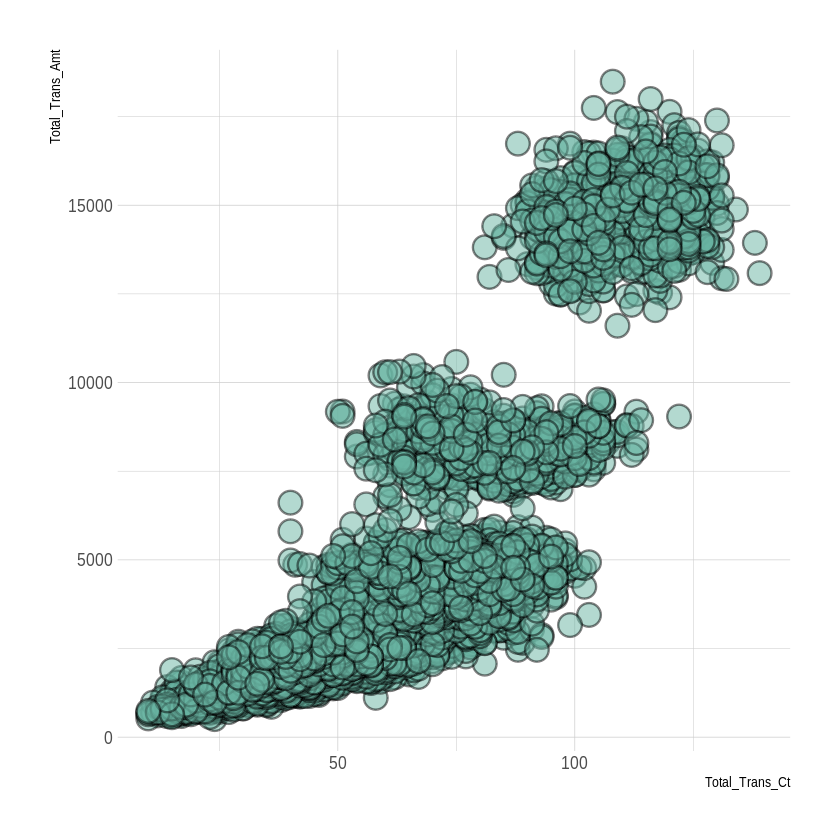

In [ ]:
ggplot(bank_data, aes(x=Total_Trans_Ct, y=Total_Trans_Amt)) + 
    geom_point(
        color="black",
        fill="#69b3a2",
        shape=21,
        alpha=0.5,
        size=6,
        stroke = 1
        )  +
    theme_ipsum()

*Dari scatter plot diatas maka kita dapat mengetahui banyaknya jumlah transaksi dari hubungan antara Total_Trans_Ct dan Total_Trans_Amt yaitu hubungan ada kecendrungan korelasi positif apabila x naik dan y naik tapi mungkin ada faktor lain yang mempengaruhi faktor lain yang berpengaruh.*



In [ ]:
cor(x, y, method='pearson')

[1] 0.807192

*Kita ketahui dari hasil korelasi antara variabel Total_Trans_Ct dan Total_Trans_Amt adalah memiiki nilai korelasi yang positif kuat.*

In [ ]:
cor.test(x,y,method='pearson')


	Pearson's product-moment correlation

data:  x and y
t = 137.6, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8002971 0.8138735
sample estimates:
     cor 
0.807192 


*Selanjutnya, kita akan melakukan uji korelasi antara Total_Trans_Ct dan Total_Trans_Amt. Dari hasil p value diatas yang bernilai <0.0000000000000002% dan tingkat kesalahan h0 sebesar 0.05, maka h0 ditolak dan h1 diterima karena tingkat kesalahan h0 lebih besar dibandingkan h1 sehingga Total_Trans_Ct dan Total_Trans_Amt korelasinya tidak sama dengan 0 atau memiliki hubungan dengan nilai korelasinya 0.81.*

### **3. Card_Category**

* **Frekuensi Card_Category**

In [ ]:
questionr::freq(Card_Category, cum = TRUE, sort = "dec", total = TRUE)

,n,%,val%,%cum,val%cum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Blue,9436,93.2,93.2,93.2,93.2
Silver,555,5.5,5.5,98.7,98.7
Gold,116,1.1,1.1,99.8,99.8
Platinum,20,0.2,0.2,100.0,100.0
Total,10127,100.0,100.0,100.0,100.0


*Kita dapat melihat bahwa, tipe kartu blue memiliki frekuensi terbanyak ( 93.2 %) dari variabel Card_Category sedangkan platinum merupakan tipe dengan frekuensi terkecil dari variabel Card_Category (0.2 %).*

*Kita juga dapat mengetahui bahwa semua data dalam variabel Card_Category valid, tidak ada missing value.*

* **Visualisasi Frekuensi Card_Category**

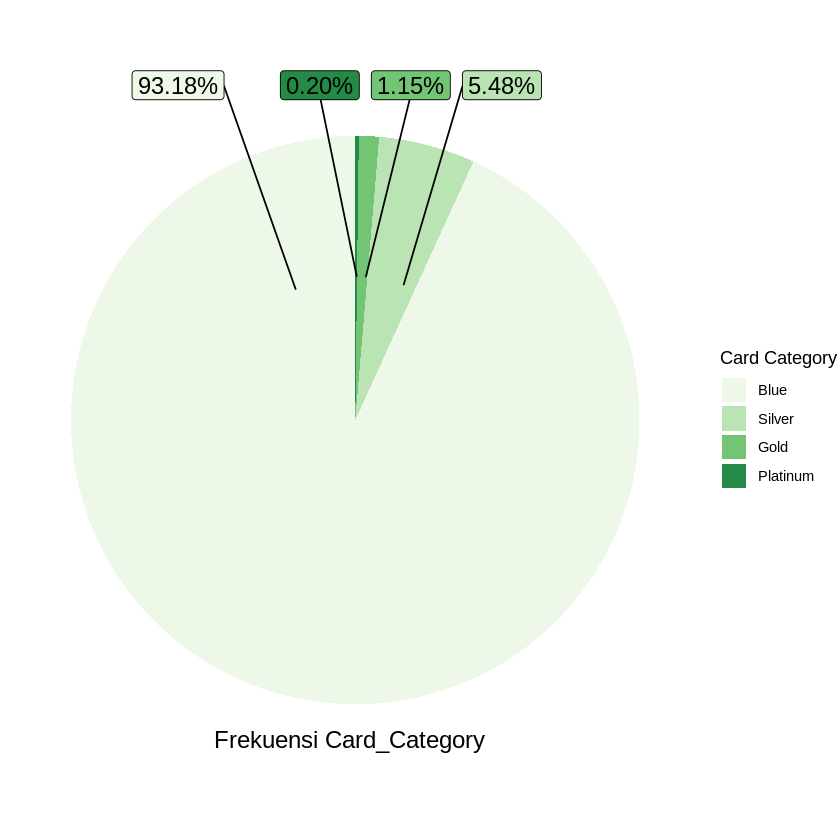

In [ ]:
card <- data.frame(table(Card_Category))
card %>%
arrange(desc(Freq)) %>%
mutate(prop = scales::percent(Freq / sum(Freq))) -> card 

ggplot(card, aes(x = "", y = Freq, fill = fct_inorder(Card_Category))) +
  geom_bar(width = 1, stat = "identity",size=1) +
  coord_polar("y", start = 0) +
  ggrepel::geom_label_repel(aes(label = prop), size=5, show.legend = F, nudge_x = 1)+
  guides(fill = guide_legend(title = "Card Category")) + 
  scale_fill_brewer(palette = "Greens") +
  theme_minimal() + 
  theme_void()
  
grid::grid.text("Frekuensi Card_Category ", x = unit(0.42, "npc"), y = unit(0.1, "npc"),vjust = -0.5, gp = grid::gpar(cex=1.2))

*Dari pie chart diatas, kita dapat melihat lebih jelas gambaran terkait frekuensi Card_Category.*

### **4. Education_Level**

* **Frekuensi Education_Level**

In [ ]:
questionr::freq(Education_Level, cum = TRUE, sort = "dec", total = TRUE)

,n,%,val%,%cum,val%cum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Graduate,3128,30.9,30.9,30.9,30.9
High School,2013,19.9,19.9,50.8,50.8
Unknown,1519,15.0,15.0,65.8,65.8
Uneducated,1487,14.7,14.7,80.4,80.4
College,1013,10.0,10.0,90.5,90.5
Post-Graduate,516,5.1,5.1,95.5,95.5
Doctorate,451,4.5,4.5,100.0,100.0
Total,10127,100.0,100.0,100.0,100.0


*Kita dapat melihat bahwa, tingkat graduate memiliki frekuensi terbanyak (30.9 %) dari variabel Education_Level sedangkan doctorate merupakan tingkat pendidikan dengan frekuensi terkecil dari variabel Education_Level (4.5 %).*

*Kita juga dapat mengetahui bahwa semua data dalam variabel Education_Level valid, tidak ada missing value.*

* **Visualisasi Frekuensi Education_Level**

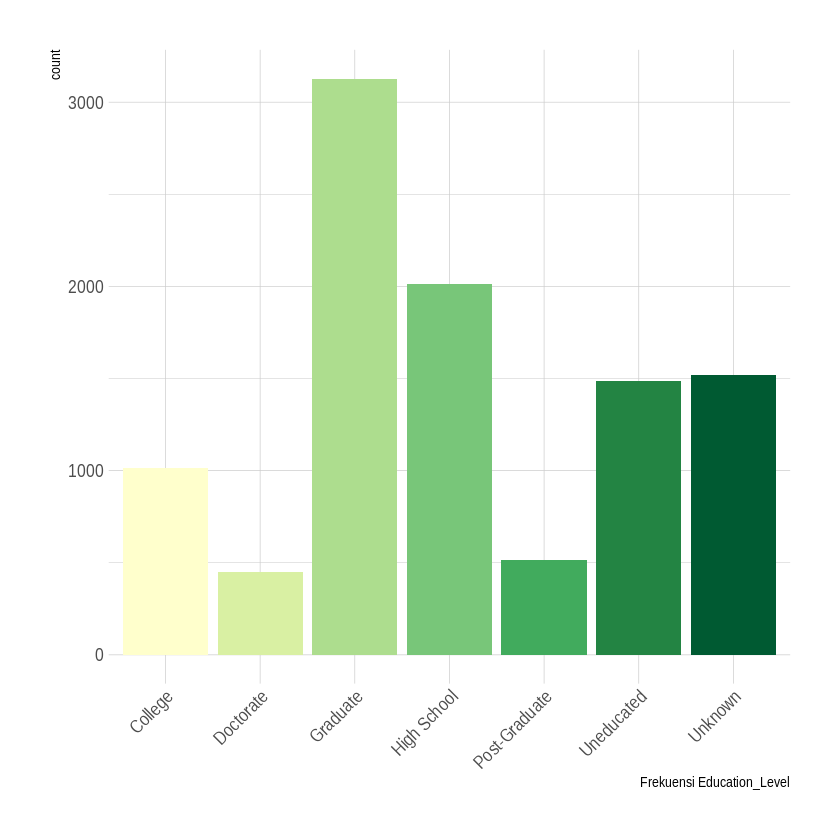

In [ ]:
ggplot(bank_data, aes(x=as.factor(Education_Level), fill=as.factor(Education_Level) )) + 
  geom_bar() +
  scale_fill_brewer(palette = "YlGn") + 
  theme_ipsum() +
  theme(legend.position="none") + 
  xlab("Frekuensi Education_Level") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

*Dari bar chart diatas, kita dapat melihat lebih jelas gambaran terkait frekuensi Education_Level.*



